#머신러닝 순서

1.  데이터수집 (feature(변수) , label(정답))
2.  데이터전처리
3.  데이터분류 ( 학습데이터, 테스트데이터)
4.  모델선정
5.  학습
6.  예측





In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [ ]:
df = pd.read_csv('appreply.csv')
df.head(10)

,Unnamed: 0,text,score
0,0,NaN,4
1,1,NaN,5
2,2,NaN,1
3,3,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
4,4,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
5,5,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
6,6,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
7,7,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3
8,8,찜매장 구분 좀 해주세요! 대체 언제쯤이면 개선될까요?? 독점이라 해이한건가요? 유...,2
9,9,"앱 실행시에 로그인 여부를 먼저 물어보고 비회원 이용을 선택할 경우, 혹은 나중에 ...",5


In [ ]:
df = df.iloc[3:]
df.head()

,Unnamed: 0,text,score
3,3,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
4,4,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
5,5,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
6,6,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
7,7,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


In [ ]:
df = df.reset_index()
df.head()

,index,Unnamed: 0,text,score
0,3,3,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,4,4,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,5,5,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,6,6,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,7,7,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


In [ ]:
df.drop(['index','Unnamed: 0'],axis=1,inplace=True)
df.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


In [ ]:
df.to_csv('appreply_new.csv')

In [ ]:
df

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3
...,...,...
995,갑자기 로그아웃 되더니 비밀번호 변경 실패 메세지가 계속 뜨네요. 휴대폰 번호로 인...,1
996,기사님이 상품 픽업을 하셨는지 표시되면 더 좋을 것 같습니다. 가게에서 조리가 늦게...,3
997,요즘 요기요 보다 배민을 많이 쓰는 사람입니다 전화보다 앱을 써서 좀더 간편하고 다...,3
998,취소 됐으면 적어도 전화 주는 제도는 있어야하는거 아닌가요? 주문해놓고 다른거 하는...,1


In [ ]:
len(df)

1000

In [ ]:
df = df.drop_duplicates(subset=['text'])
len(df)

1000

In [ ]:
df.isnull().sum()

text     0
score    0
dtype: int64

In [ ]:
['댓글','댓글1','댓글2',....] => '댓글 댓글1 댓글2 .... '

In [ ]:
text_data = ' '.join(list(df['text']))
text_data

'배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,별점순 뿐만아니라 제가 주문하고자하는 메뉴를 특정해서 그 메뉴의 리뷰만 확인할 수 있는 기능이 있으면 좋을 것 같습니다. 메뉴검색 기능처럼 리뷰에서도 특정 메뉴 검색기능이 필요합니다. 주문수가 많지않은 메뉴의 리뷰를 보기 위해서 드래그하느라 시간이 많이 소요되는 비효율이 발생합니다. 긍정적으로 검토해주심 좋을 것 같습니다. 내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 기억은 있는데 뭘시켰고 맛있게 먹은게 맞는지 알고싶은데 찾기가 너무 어렵네요.. 먹던 메뉴도 검색가능했으면 좋겠어요! 예를 들면 곱창 을 치면 과거에 시킨 곱창목록이 뜨거나 혹은 가게 리뷰창에 내리뷰보기 가 있어도 좋을거같아요 :) 검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스크롤하는데 자꾸만 왼쪽 오른쪽으로 넘어가서 전체 탭이나 포장 탭을 보게 되는데 정말 불편합니다. 검색 후 배달 탭, 포장 탭, B마트 탭 뭐든 하나를 선택했으면 좌우로 넘기는 건 안 되게 하시면 안되나요? 가끔 그러는 것도 아니고 스크롤 한 번 내릴 때마다 왼쪽으로 넘어가서 전체 탭에 가게 되니까 너무 불편하고 답답해서 씁니다 배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니다. 그리고 지역에 따라 추가 배달료가 있다고 별도로 체크하게 되어있어서 결국 배달팁은 5000원이 넘습니다. 10만원 이상 시키면 배달팁 0원이라는데 장난하는 것도 아니고.... 결국 하나하나 눌러가면서 가격대별 금액을 체크하고 배달팁 별도로 받는지도 확인해야합니다. 최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 업데이트 하라고 나오고 업데이트 누르면 업데이트 진행은 안되고 열기 나오고 열기 누르면 업데이트 나오고 무한반복.. 수없이 삭제와 재설치 환경설정등을 해보아도 같은 증상이네요.. 다른분들도 다 같은 증상으로 보이는 글들

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 43.9 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt
from collections import Counter
okt = Okt()
nouns = okt.nouns(text_data)
counter = Counter(nouns)
counter

Counter({'배달': 938,
         '민족': 77,
         '주문': 544,
         '시': 71,
         '리뷰': 352,
         '자주': 58,
         '참고': 28,
         '편입': 1,
         '니': 5,
         '한가지': 28,
         '건의': 20,
         '사항': 76,
         '최신': 29,
         '순': 73,
         '점순': 1,
         '뿐': 15,
         '제': 94,
         '자하': 1,
         '메뉴': 341,
         '그': 96,
         '확인': 139,
         '수': 288,
         '기능': 234,
         '것': 257,
         '검색': 197,
         '특정': 19,
         '수가': 24,
         '보기': 51,
         '위해': 31,
         '드': 2,
         '래그': 1,
         '시간': 159,
         '소요': 4,
         '비': 130,
         '효율': 6,
         '발생': 14,
         '긍정': 1,
         '검토': 7,
         '주심': 2,
         '내': 73,
         '과거': 7,
         '목록': 62,
         '분명': 11,
         '이': 105,
         '가게': 373,
         '기억': 16,
         '뭘': 19,
         '찾기': 39,
         '예': 18,
         '곱창': 3,
         '치면': 2,
         '창': 52,
         '화면': 126,
       

In [ ]:
freq_data = Counter({x: counter[x] for x in counter if len(x)>1})
freq_data.most_common(10)

[('배달', 938),
 ('주문', 544),
 ('가게', 373),
 ('리뷰', 352),
 ('메뉴', 341),
 ('배민', 302),
 ('사용', 282),
 ('결제', 242),
 ('기능', 234),
 ('어플', 223)]

In [ ]:
import re
from tqdm import tqdm

noun_result = []

for temp in tqdm(df['text']):
    han = re.compile('[^ㄱ-ㅣ가-힣]')
    temp_result = han.sub(' ',temp)
    temp_nouns = okt.nouns(temp_result)
    temp_nouns_result = [x for x in temp_nouns if len(x)>1]
    noun_result.append(temp_nouns_result)

100%|██████████| 1000/1000 [00:09<00:00, 100.72it/s]


In [ ]:
noun_result

[['배달',
  '민족',
  '주문',
  '리뷰',
  '자주',
  '참고',
  '편입',
  '한가지',
  '건의',
  '사항',
  '최신',
  '점순',
  '주문',
  '자하',
  '메뉴',
  '메뉴',
  '리뷰',
  '확인',
  '기능',
  '메뉴',
  '검색',
  '기능',
  '리뷰',
  '특정',
  '메뉴',
  '검색',
  '기능',
  '주문',
  '수가',
  '메뉴',
  '리뷰',
  '보기',
  '위해',
  '래그',
  '시간',
  '소요',
  '효율',
  '발생',
  '긍정',
  '검토',
  '주심'],
 ['주문',
  '과거',
  '목록',
  '검색',
  '기능',
  '분명',
  '가게',
  '기억',
  '찾기',
  '메뉴',
  '검색',
  '곱창',
  '치면',
  '과거',
  '곱창',
  '목록',
  '가게',
  '리뷰',
  '리뷰',
  '보기'],
 ['검색',
  '화면',
  '전체',
  '배달',
  '포장',
  '배달',
  '크롤',
  '아래',
  '크롤',
  '자꾸만',
  '왼쪽',
  '오른쪽',
  '전체',
  '포장',
  '정말',
  '검색',
  '배달',
  '포장',
  '마트',
  '하나',
  '선택',
  '좌우',
  '가끔',
  '크롤',
  '왼쪽',
  '전체',
  '가게'],
 ['배달',
  '정렬',
  '가게',
  '가장',
  '위로',
  '지역',
  '추가',
  '배달',
  '별도',
  '체크',
  '배달',
  '만원',
  '이상',
  '배달',
  '장난',
  '하나',
  '하나',
  '가격',
  '대별',
  '금액',
  '체크',
  '배달',
  '별도',
  '확인'],
 ['최근',
  '업데이트',
  '안드로이드',
  '사양',
  '정도',
  '배민',
  '어플',
  '실행',
  '업데이트',
  '하라',
  '업데이트',


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
tfidf = tfidf_vec.fit_transform(noun_result).toarray()
print(tfidf_vec.vocabulary_)
tfidf

{'배달': 969, '민족': 907, '주문': 2181, '리뷰': 718, '자주': 1974, '참고': 2311, '편입': 2551, '한가지': 2643, '건의': 130, '사항': 1194, '최신': 2375, '점순': 2079, '자하': 1978, '메뉴': 807, '확인': 2747, '기능': 321, '검색': 131, '특정': 2517, '수가': 1318, '보기': 1030, '위해': 1794, '래그': 680, '시간': 1386, '소요': 1302, '효율': 2776, '발생': 945, '긍정': 316, '검토': 137, '주심': 2191, '과거': 218, '목록': 845, '분명': 1088, '가게': 0, '기억': 341, '찾기': 2319, '곱창': 203, '치면': 2409, '화면': 2740, '전체': 2060, '포장': 2569, '크롤': 2459, '아래': 1472, '자꾸만': 1958, '왼쪽': 1720, '오른쪽': 1681, '정말': 2099, '마트': 749, '하나': 2621, '선택': 1259, '좌우': 2169, '가끔': 10, '정렬': 2096, '가장': 33, '위로': 1788, '지역': 2246, '추가': 2382, '별도': 1022, '체크': 2349, '만원': 763, '이상': 1862, '장난': 1994, '가격': 1, '대별': 542, '금액': 312, '최근': 2368, '업데이트': 1601, '안드로이드': 1502, '사양': 1176, '정도': 2094, '배민': 972, '어플': 1583, '실행': 1446, '하라': 2629, '진행': 2279, '열기': 1656, '무한': 865, '반복': 938, '삭제': 1196, '설치': 1267, '환경설정': 2753, '증상': 2228, '다른': 468, '이번': 1858, '관련': 230, '파일': 2524, '핸드

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19910076, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07763765, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06731077, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
tfidf.shape

(1000, 2795)

In [ ]:
df

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3
...,...,...
995,갑자기 로그아웃 되더니 비밀번호 변경 실패 메세지가 계속 뜨네요. 휴대폰 번호로 인...,1
996,기사님이 상품 픽업을 하셨는지 표시되면 더 좋을 것 같습니다. 가게에서 조리가 늦게...,3
997,요즘 요기요 보다 배민을 많이 쓰는 사람입니다 전화보다 앱을 써서 좀더 간편하고 다...,3
998,취소 됐으면 적어도 전화 주는 제도는 있어야하는거 아닌가요? 주문해놓고 다른거 하는...,1


In [ ]:
df['score_real'] = np.where(df['score']>3,1,0)
df

,text,score,score_real
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4,1
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5,1
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1,0
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2,0
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3,0
...,...,...,...
995,갑자기 로그아웃 되더니 비밀번호 변경 실패 메세지가 계속 뜨네요. 휴대폰 번호로 인...,1,0
996,기사님이 상품 픽업을 하셨는지 표시되면 더 좋을 것 같습니다. 가게에서 조리가 늦게...,3,0
997,요즘 요기요 보다 배민을 많이 쓰는 사람입니다 전화보다 앱을 써서 좀더 간편하고 다...,3,0
998,취소 됐으면 적어도 전화 주는 제도는 있어야하는거 아닌가요? 주문해놓고 다른거 하는...,1,0


In [ ]:
tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19910076, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07763765, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06731077, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
df['score_real'].value_counts()

score_real
0    729
1    271
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x = tfidf
y = df['score_real']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.5, stratify=y)

print(len(X_train) , (len(X_test)))
print(len(y_train) , (len(y_test)))

700 300
700 300


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
model.coef_

array([[ 0.27042742,  0.08358937,  0.11977613, ..., -0.03757144,
         0.        , -0.014991  ]])

In [ ]:
model.intercept_

array([-1.28000712])

In [ ]:
y_test

298    0
483    1
301    0
609    0
714    0
      ..
533    1
675    0
731    0
159    0
212    0
Name: score_real, Length: 300, dtype: int64

In [ ]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.78

In [ ]:
precision_score(y_test,y_pred)

0.8260869565217391

In [ ]:
recall_score(y_test,y_pred)

0.2345679012345679

In [ ]:
f1_score(y_test,y_pred)

0.36538461538461536

In [ ]:
tfidf_vec.vocabulary_

{'배달': 969,
 '민족': 907,
 '주문': 2181,
 '리뷰': 718,
 '자주': 1974,
 '참고': 2311,
 '편입': 2551,
 '한가지': 2643,
 '건의': 130,
 '사항': 1194,
 '최신': 2375,
 '점순': 2079,
 '자하': 1978,
 '메뉴': 807,
 '확인': 2747,
 '기능': 321,
 '검색': 131,
 '특정': 2517,
 '수가': 1318,
 '보기': 1030,
 '위해': 1794,
 '래그': 680,
 '시간': 1386,
 '소요': 1302,
 '효율': 2776,
 '발생': 945,
 '긍정': 316,
 '검토': 137,
 '주심': 2191,
 '과거': 218,
 '목록': 845,
 '분명': 1088,
 '가게': 0,
 '기억': 341,
 '찾기': 2319,
 '곱창': 203,
 '치면': 2409,
 '화면': 2740,
 '전체': 2060,
 '포장': 2569,
 '크롤': 2459,
 '아래': 1472,
 '자꾸만': 1958,
 '왼쪽': 1720,
 '오른쪽': 1681,
 '정말': 2099,
 '마트': 749,
 '하나': 2621,
 '선택': 1259,
 '좌우': 2169,
 '가끔': 10,
 '정렬': 2096,
 '가장': 33,
 '위로': 1788,
 '지역': 2246,
 '추가': 2382,
 '별도': 1022,
 '체크': 2349,
 '만원': 763,
 '이상': 1862,
 '장난': 1994,
 '가격': 1,
 '대별': 542,
 '금액': 312,
 '최근': 2368,
 '업데이트': 1601,
 '안드로이드': 1502,
 '사양': 1176,
 '정도': 2094,
 '배민': 972,
 '어플': 1583,
 '실행': 1446,
 '하라': 2629,
 '진행': 2279,
 '열기': 1656,
 '무한': 865,
 '반복': 938,
 '삭제': 1196,
 '설치': 126

In [ ]:
invert_index_vectorizer = {v:k for k,v in tfidf_vec.vocabulary_.items()}
invert_index_vectorizer

{969: '배달',
 907: '민족',
 2181: '주문',
 718: '리뷰',
 1974: '자주',
 2311: '참고',
 2551: '편입',
 2643: '한가지',
 130: '건의',
 1194: '사항',
 2375: '최신',
 2079: '점순',
 1978: '자하',
 807: '메뉴',
 2747: '확인',
 321: '기능',
 131: '검색',
 2517: '특정',
 1318: '수가',
 1030: '보기',
 1794: '위해',
 680: '래그',
 1386: '시간',
 1302: '소요',
 2776: '효율',
 945: '발생',
 316: '긍정',
 137: '검토',
 2191: '주심',
 218: '과거',
 845: '목록',
 1088: '분명',
 0: '가게',
 341: '기억',
 2319: '찾기',
 203: '곱창',
 2409: '치면',
 2740: '화면',
 2060: '전체',
 2569: '포장',
 2459: '크롤',
 1472: '아래',
 1958: '자꾸만',
 1720: '왼쪽',
 1681: '오른쪽',
 2099: '정말',
 749: '마트',
 2621: '하나',
 1259: '선택',
 2169: '좌우',
 10: '가끔',
 2096: '정렬',
 33: '가장',
 1788: '위로',
 2246: '지역',
 2382: '추가',
 1022: '별도',
 2349: '체크',
 763: '만원',
 1862: '이상',
 1994: '장난',
 1: '가격',
 542: '대별',
 312: '금액',
 2368: '최근',
 1601: '업데이트',
 1502: '안드로이드',
 1176: '사양',
 2094: '정도',
 972: '배민',
 1583: '어플',
 1446: '실행',
 2629: '하라',
 2279: '진행',
 1656: '열기',
 865: '무한',
 938: '반복',
 1196: '삭제',
 1267: '설치

In [ ]:
model.coef_[0]

array([ 0.27042742,  0.08358937,  0.11977613, ..., -0.03757144,
        0.        , -0.014991  ])

In [ ]:
invert_index_vectorizer[718]

'리뷰'

In [ ]:
coef_pos_index = sorted(((value,index) for index,value in enumerate(model.coef_[0])), reverse=True)
coef_pos_index

[(2.0846758526689317, 321),
 (1.9308920089789232, 718),
 (1.8039859567745467, 807),
 (1.5992467870425127, 1818),
 (1.5724159378766522, 471),
 (1.4045936601811468, 1179),
 (1.221646883482709, 1194),
 (1.1211857480531415, 1259),
 (1.0188113960492022, 1237),
 (1.0141112090054352, 812),
 (1.014033282609229, 922),
 (1.0064993241808653, 1974),
 (0.9928441799113156, 131),
 (0.9452084274578875, 2099),
 (0.8882869932895961, 130),
 (0.8750127830789274, 2425),
 (0.8733412134637722, 1168),
 (0.839178585892122, 2643),
 (0.8152302629296607, 37),
 (0.7522611628101968, 2517),
 (0.7412325955923481, 845),
 (0.7059455888667985, 2382),
 (0.6720933432527523, 1211),
 (0.6698005207757293, 2678),
 (0.6572181754831691, 91),
 (0.6491782576399397, 1707),
 (0.6478654763038904, 160),
 (0.62855214970665, 1877),
 (0.6136318311996131, 151),
 (0.608735977090592, 817),
 (0.6062087613017327, 907),
 (0.6001070252494641, 1087),
 (0.5996183370390817, 749),
 (0.5862091961127502, 2186),
 (0.5704680298688561, 1532),
 (0.56464

In [ ]:
for temp in coef_pos_index[:20]:
    print(invert_index_vectorizer[temp[1]])

기능
리뷰
메뉴
음식
다만
사용
사항
선택
생각
메모
바로
자주
검색
정말
건의
카테고리
사람
한가지
가지
특정


In [ ]:
coef_neg_index = sorted(((value,index) for index,value in enumerate(model.coef_[0])), reverse=False)
for temp in coef_neg_index[:20]:
    print(invert_index_vectorizer[temp[1]])

업데이트
쿠폰
다시
고객
전화
광고
취소
설정
계속
만원
라이더
진짜
그냥
시간
매우
로그인
지도
이제
기사
점점


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
tfidf_vec.vocabulary_

{'배달': 969,
 '민족': 907,
 '주문': 2181,
 '리뷰': 718,
 '자주': 1974,
 '참고': 2311,
 '편입': 2551,
 '한가지': 2643,
 '건의': 130,
 '사항': 1194,
 '최신': 2375,
 '점순': 2079,
 '자하': 1978,
 '메뉴': 807,
 '확인': 2747,
 '기능': 321,
 '검색': 131,
 '특정': 2517,
 '수가': 1318,
 '보기': 1030,
 '위해': 1794,
 '래그': 680,
 '시간': 1386,
 '소요': 1302,
 '효율': 2776,
 '발생': 945,
 '긍정': 316,
 '검토': 137,
 '주심': 2191,
 '과거': 218,
 '목록': 845,
 '분명': 1088,
 '가게': 0,
 '기억': 341,
 '찾기': 2319,
 '곱창': 203,
 '치면': 2409,
 '화면': 2740,
 '전체': 2060,
 '포장': 2569,
 '크롤': 2459,
 '아래': 1472,
 '자꾸만': 1958,
 '왼쪽': 1720,
 '오른쪽': 1681,
 '정말': 2099,
 '마트': 749,
 '하나': 2621,
 '선택': 1259,
 '좌우': 2169,
 '가끔': 10,
 '정렬': 2096,
 '가장': 33,
 '위로': 1788,
 '지역': 2246,
 '추가': 2382,
 '별도': 1022,
 '체크': 2349,
 '만원': 763,
 '이상': 1862,
 '장난': 1994,
 '가격': 1,
 '대별': 542,
 '금액': 312,
 '최근': 2368,
 '업데이트': 1601,
 '안드로이드': 1502,
 '사양': 1176,
 '정도': 2094,
 '배민': 972,
 '어플': 1583,
 '실행': 1446,
 '하라': 2629,
 '진행': 2279,
 '열기': 1656,
 '무한': 865,
 '반복': 938,
 '삭제': 1196,
 '설치': 126

In [ ]:
reply_text = '메뉴가 많아서 좋아요'

def reply_predict(text):
    han = re.compile('[^ㄱ-ㅣ가-힣]')
    temp_result = han.sub(' ',text)
    temp_noun = okt.nouns(temp_result)
    print(temp_noun)
    result_noun = [x for x in temp_noun if len(x)>1]
    print(result_noun)
    tfidf_result = tfidf_vec.transform([result_noun])
    print(model.predict(tfidf_result)[0])
    result = ''
    if model.predict(tfidf_result)[0] == 1:
        result = '긍정'
    else:
        result = '부정'

    return result

reply_predict(reply_text)

['메뉴']
['메뉴']
1


'긍정'

Text(51.722222222222214, 0.5, 'true')

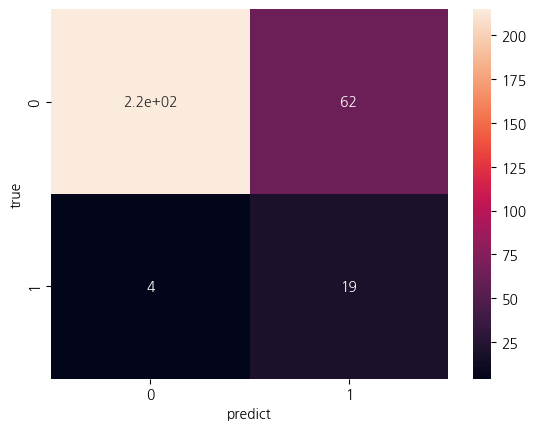

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)
plt.xlabel('predict')
plt.ylabel('true')